# EDA on Dinosaur kaggle dataset
The goal of this colab is to demonstrate the EDA process on the dinosaur kaggle dataset using D3.js visualizations

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/dinosaur.csv'
df = pd.read_csv(file_path)

# Show the first few rows to understand the structure
df.head()


,Clade,Genus,Species,GenusFinal,SpeciesFinal,Specimen,Reference,Page,R L,L L,...,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Total Entries,Fem Entries,Difference,Unnamed: 101
0,Ankylosauria,Aletopelta,coombsi,Aletopelta,coombsi,SDNHM 33909,Ford & Kirkland 2001,247-248,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,4.0,NaN
1,Ankylosauria,Animantarx,ramaljonesi,Animantarx,ramaljonesi,CEUM 6228R,Carpenter et al 1999,246,NaN,NaN,...,Christian Foth,NaN,NaN,NaN,NaN,NaN,3.0,1.0,2.0,NaN
2,Ankylosauria,Ankylosaurus,magniventris,Ankylosaurus,magniventris,AMNH 5214,Carrano 2006,Table A8.1 (unnumbered),NaN,NaN,...,David Button,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.0,NaN
3,Ankylosauria,Ankylosaurus,magniventris,Ankylosaurus,magniventris,AMNH 5214,personal observation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,NaN
4,Ankylosauria,Ankylosaurus,magniventris,Ankylosaurus,magniventris,AMNH 5214,"Varialle, pers. obs.",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN


In [3]:
# Number of rows and columns
num_rows, num_cols = df.shape

# Data types of the columns
data_types = df.dtypes

# Summary statistics
summary_stats = df.describe(include='all')

num_rows, num_cols, data_types.head(), summary_stats.head()


(1937,
 102,
 Clade           object
 Genus           object
 Species         object
 GenusFinal      object
 SpeciesFinal    object
 dtype: object,
                 Clade       Genus   Species  GenusFinal SpeciesFinal Specimen  \
 count            1937        1803      1612        1897         1806     1924   
 unique             20         217       252         207          223     1176   
 top     Hadrosauridae  Dryosaurus  lakustai  Dryosaurus     lakustai     SMNS   
 freq              461         111       105         112          105       21   
 mean              NaN         NaN       NaN         NaN          NaN      NaN   
 
                    Reference                     Page  R L  L L  ...  \
 count                   1937                     1113   14   17  ...   
 unique                   236                      309   13   17  ...   
 top     personal observation  Table A8.1 (unnumbered)  386  257  ...   
 freq                     465                       94    2    1 

In [4]:
# Check for missing values in each column
missing_values_count = df.isnull().sum()

# Show columns with missing values
missing_values_count[missing_values_count > 0]


Genus             134
Species           325
GenusFinal         40
SpeciesFinal      131
Specimen           13
                 ... 
Unnamed: 97      1937
Total Entries      77
Fem Entries        48
Difference         48
Unnamed: 101     1908
Length: 100, dtype: int64

In [5]:
# Drop rows with missing values in key columns
key_columns = ['Clade', 'Genus', 'Species']
df_cleaned = df.dropna(subset=key_columns)

# Impute missing values in numerical columns with median
numerical_columns = ['Total Entries', 'Fem Entries', 'Difference']
for col in numerical_columns:
    median_value = df_cleaned[col].median()
    df_cleaned[col].fillna(median_value, inplace=True)

# Check if missing values are handled for key and numerical columns
missing_values_after = df_cleaned[key_columns + numerical_columns].isnull().sum()
missing_values_after


<ipython-input-5-2e247e39008e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(median_value, inplace=True)
<ipython-input-5-2e247e39008e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(median_value, inplace=True)
<ipython-input-5-2e247e39008e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(median_value, inplace=True)


Clade            0
Genus            0
Species          0
Total Entries    0
Fem Entries      0
Difference       0
dtype: int64

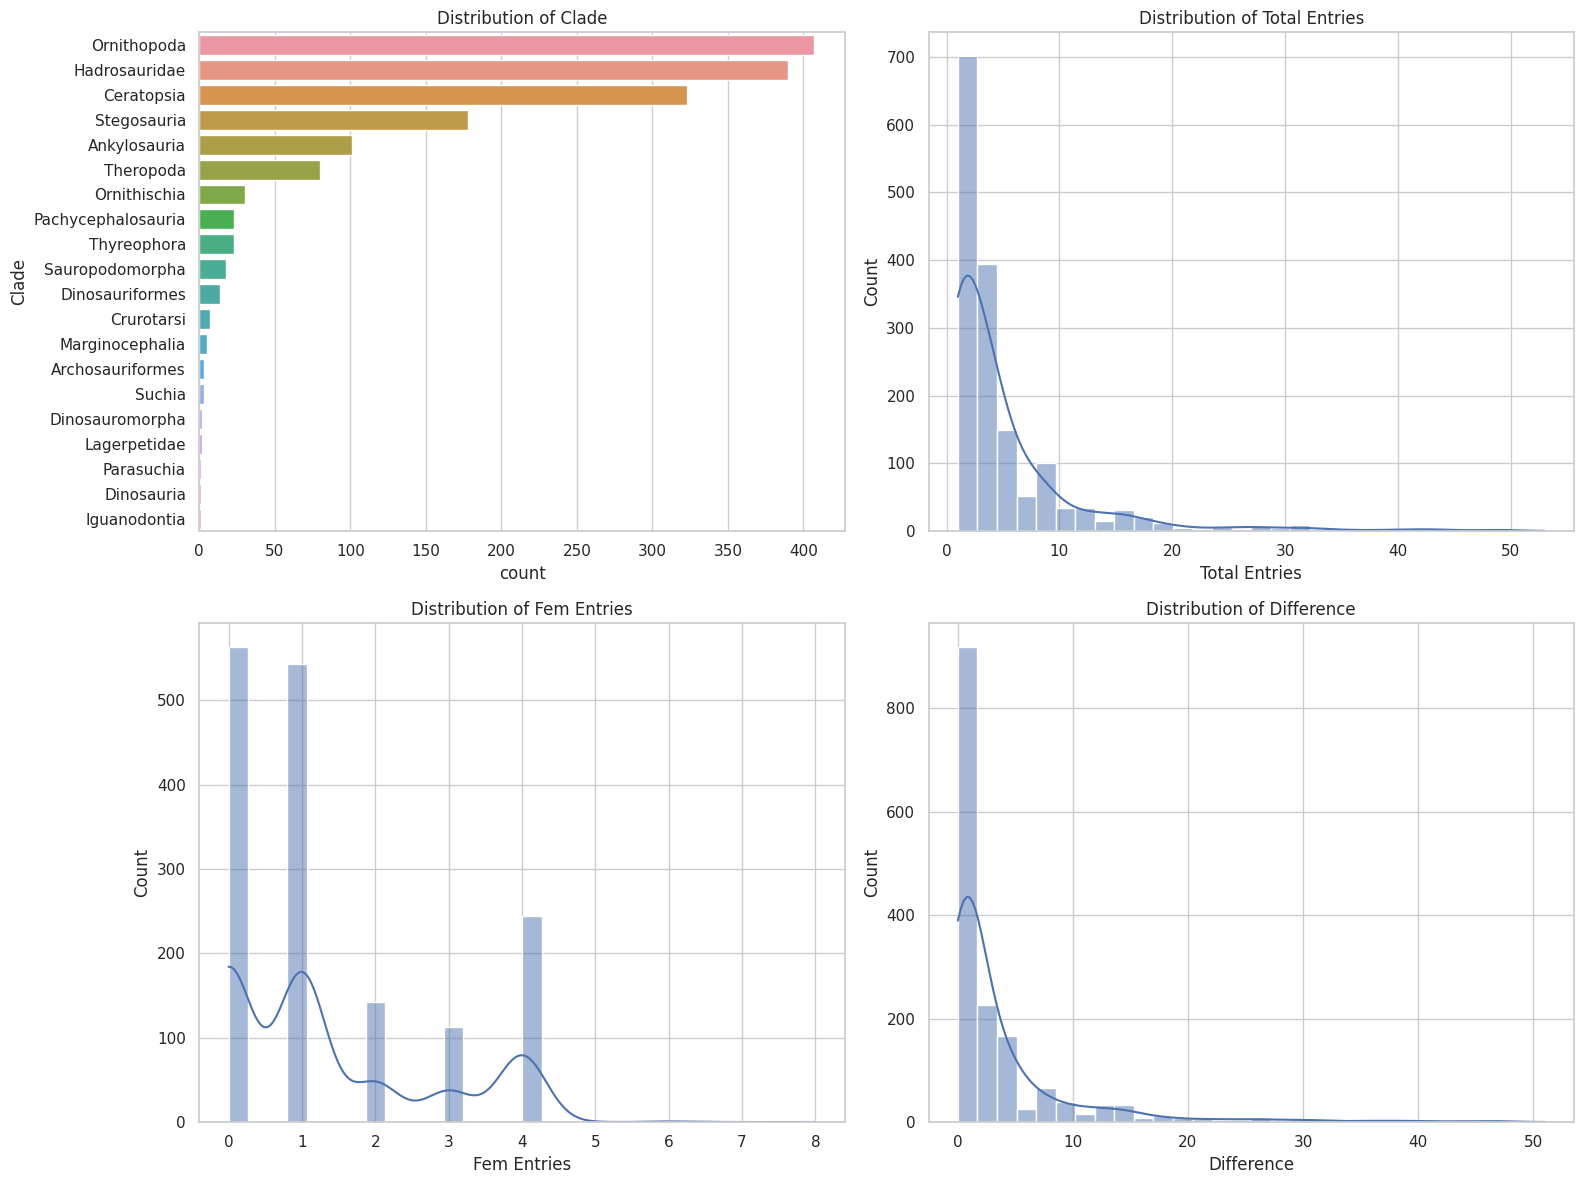

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for 'Clade'
sns.countplot(data=df_cleaned, y='Clade', ax=axes[0, 0], order = df_cleaned['Clade'].value_counts().index)
axes[0, 0].set_title('Distribution of Clade')

# Plot for 'Total Entries'
sns.histplot(df_cleaned['Total Entries'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Total Entries')

# Plot for 'Fem Entries'
sns.histplot(df_cleaned['Fem Entries'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Fem Entries')

# Plot for 'Difference'
sns.histplot(df_cleaned['Difference'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Difference')

plt.tight_layout()
plt.show()


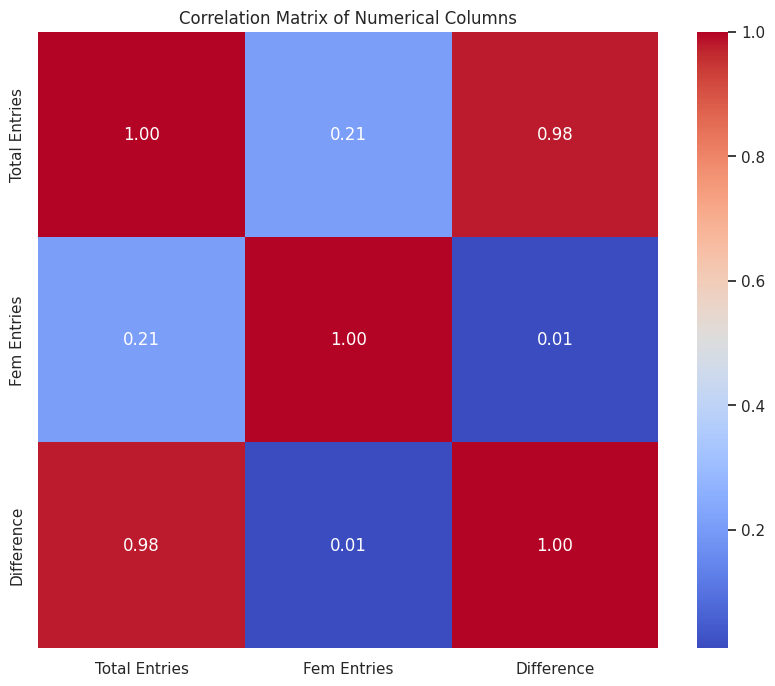

In [7]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df_cleaned[numerical_columns].corr()

# Generate a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [8]:
# Top 10 species by 'Total Entries'
top_species = df_cleaned.groupby('Species')['Total Entries'].sum().sort_values(ascending=False).head(10)

# Aggregate statistics by 'Clade'
clade_stats = df_cleaned.groupby('Clade')[numerical_columns].mean().sort_values(by='Total Entries', ascending=False)

top_species, clade_stats


(Species
 bauri              339.0
 sp.                317.0
 apertus            249.0
 annectens          217.0
 dispar             215.0
 foxii              206.0
 bernissartensis    195.0
 tilletti           194.0
 casuarius          185.0
 lettowvorbecki     185.0
 Name: Total Entries, dtype: float64,
                     Total Entries  Fem Entries  Difference
 Clade                                                     
 Suchia                  22.666667     1.333333   21.333333
 Lagerpetidae            15.500000     1.000000   14.500000
 Sauropodomorpha         13.444444     1.222222   12.222222
 Ornithischia            11.700000     1.733333    9.966667
 Dinosauriformes          9.642857     2.571429    7.071429
 Crurotarsi               9.428571     1.000000    8.428571
 Dinosauromorpha          8.000000     0.500000    7.500000
 Theropoda                6.225000     1.012500    5.212500
 Hadrosauridae            5.461538     1.356410    4.120513
 Ornithopoda              5.38083